In [1]:
import sys
import re
import os
from datetime import datetime
from time import sleep
from IPython.display import display, clear_output, HTML

# set working dir
WORKING_DIR = re.sub('jdi-qasp-ml.*$','',os.path.normpath(os.getcwd())) + 'jdi-qasp-ml'
os.chdir(WORKING_DIR)

import utils
from utils import *
import torch
import pandas as pd
import numpy as np
import torch
from glob import glob
import selenium
from tqdm.auto import tqdm

START_TS = datetime.now()
display(HTML(f'{START_TS} - Current working directory: <b>{WORKING_DIR}</b>'))

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

import numba



2021-06-07 22:21:10,028 -INFO - config:config.py:16 - Module utils.config was loaded
2021-06-07 22:21:10,033 -INFO - common:common.py:616 - Module utils.common is loaded...
2021-06-07 22:21:10,035 -INFO - hidden:hidden.py:121 - hidden module is loaded
2021-06-07 22:21:10,038 -INFO - dataset_builder:dataset_builder.py:202 - dataset package is loaded...
2021-06-07 22:21:10,773 -INFO - dataset:dataset.py:653 - dataset module is loaded...


In [2]:
from utils import get_all_elements, iou_xywh, screenshot, maximize_window, get_parents_list, build_tree_dict, DatasetBuilder

In [3]:
selenium.__version__

'3.141.0'

# Parameters

In [4]:
SITE_URL = 'https://jdi-testing.github.io/jdi-light/'
LOGIN = 'Roman'
PASSWORD = 'Jdi1234'
SAVE_SCREEN = True
WAIT_TIME_SECONDS = 7
HEADLESS = True #False

In [5]:
with open('dataset/classes.txt', 'r') as f:
    decoder_dict = { i:s.strip() for i, s in  enumerate(f.readlines())}
    encoder_dict = { v: k for k, v in decoder_dict.items()}
decoder_dict, encoder_dict

({0: 'button',
  1: 'link',
  2: 'textfield',
  3: 'dropdown',
  4: 'checkbox',
  5: 'radiobutton',
  6: 'textarea',
  7: 'fileinput',
  8: 'iframe',
  9: 'range',
  10: 'progressbar',
  11: 'datetimeselector',
  12: 'colorpicker',
  13: 'numberselector',
  14: 'selector',
  15: 'table',
  16: 'slider-toggle',
  17: 'slider',
  18: 'tree-node',
  19: 'steper',
  20: 'tab',
  21: 'n/a'},
 {'button': 0,
  'link': 1,
  'textfield': 2,
  'dropdown': 3,
  'checkbox': 4,
  'radiobutton': 5,
  'textarea': 6,
  'fileinput': 7,
  'iframe': 8,
  'range': 9,
  'progressbar': 10,
  'datetimeselector': 11,
  'colorpicker': 12,
  'numberselector': 13,
  'selector': 14,
  'table': 15,
  'slider-toggle': 16,
  'slider': 17,
  'tree-node': 18,
  'steper': 19,
  'tab': 20,
  'n/a': 21})

# Generate dataset

In [6]:
pages = [
    'Button Groups',
    'Buttons',
    'Textarea Autosize',
    'Checkbox',
    'Floating Action Button',
    ##'Date / Time',
    'Radio',
    'Select',
    'Slider',
    'Switch',
    'Text Field',
    'List',
    'Progress'
]

<hr style="height: 5px">

In [7]:
ds_list = glob('dataset/images/material-ui-*.png')
ds_list

['dataset/images\\material-ui-Button Groups.png',
 'dataset/images\\material-ui-Buttons.png',
 'dataset/images\\material-ui-Checkbox.png',
 'dataset/images\\material-ui-Floating Action Button.png',
 'dataset/images\\material-ui-List.png',
 'dataset/images\\material-ui-Progress.png',
 'dataset/images\\material-ui-Radio.png',
 'dataset/images\\material-ui-Select.png',
 'dataset/images\\material-ui-Slider.png',
 'dataset/images\\material-ui-Switch.png',
 'dataset/images\\material-ui-Text Field.png',
 'dataset/images\\material-ui-Textarea Autosize.png']

2021-06-07 22:21:52,319 -INFO - hidden:hidden.py:107 - build field "is_hidden"
Image size: 1200 3000
Read annotations for material-ui-Button Groups...


,label,x,y,width,height,box
0,0,0.525000,0.054667,0.050000,0.012000,"(600, 146, 60, 36)"
1,0,0.575833,0.054667,0.053333,0.012000,"(658, 146, 63, 36)"
2,0,0.633750,0.054667,0.064167,0.012000,"(721, 146, 77, 36)"
3,0,0.225417,0.105667,0.064167,0.012000,"(232, 299, 77, 36)"
4,0,0.224583,0.117667,0.062500,0.010667,"(231, 337, 75, 32)"
...,...,...,...,...,...,...
72,0,0.083333,0.824000,0.165000,0.016000,"(0, 2448, 198, 48)"
73,0,0.083333,0.840000,0.165000,0.016000,"(0, 2496, 198, 48)"
74,0,0.083333,0.856000,0.165000,0.016000,"(0, 2544, 198, 48)"
75,0,0.083333,0.872000,0.165000,0.016000,"(0, 2592, 198, 48)"


2021-06-07 22:21:52,623 -INFO - labels:labels.py:40 - Assign labels from annotation file: dataset/annotations/material-ui-Button Groups.txt
2021-06-07 22:21:52,633 -INFO - labels:labels.py:42 - Getting image size
2021-06-07 22:21:52,634 -INFO - labels:labels.py:44 - Image size (w,h): (1200, 3000)
2021-06-07 22:21:52,635 -INFO - labels:labels.py:49 - {'button': 0, 'link': 1, 'textfield': 2, 'dropdown': 3, 'checkbox': 4, 'radiobutton': 5, 'textarea': 6, 'fileinput': 7, 'iframe': 8, 'range': 9, 'progressbar': 10, 'datetimeselector': 11, 'colorpicker': 12, 'numberselector': 13, 'selector': 14, 'table': 15, 'slider-toggle': 16, 'slider': 17, 'tree-node': 18, 'steper': 19, 'tab': 20, 'n/a': 21}
2021-06-07 22:21:52,635 -INFO - labels:labels.py:57 - getting "n/a" class code
2021-06-07 22:21:52,636 -INFO - labels:labels.py:64 - "n/a" class code: 21
2021-06-07 22:21:52,638 -INFO - labels:labels.py:74 - 77 annotation has been read


Assign labels:   0%|          | 0/77 [00:00<?, ?it/s]

2021-06-07 22:21:57,821 -INFO - labels:labels.py:123 - labels_df: Index(['idx', 'label', 'annotation_line_no', 'iou', 'tag', 'label_text'], dtype='object')
2021-06-07 22:21:57,822 -INFO - labels:labels.py:126 - 77 labels have been assigned
Attempt to display image...


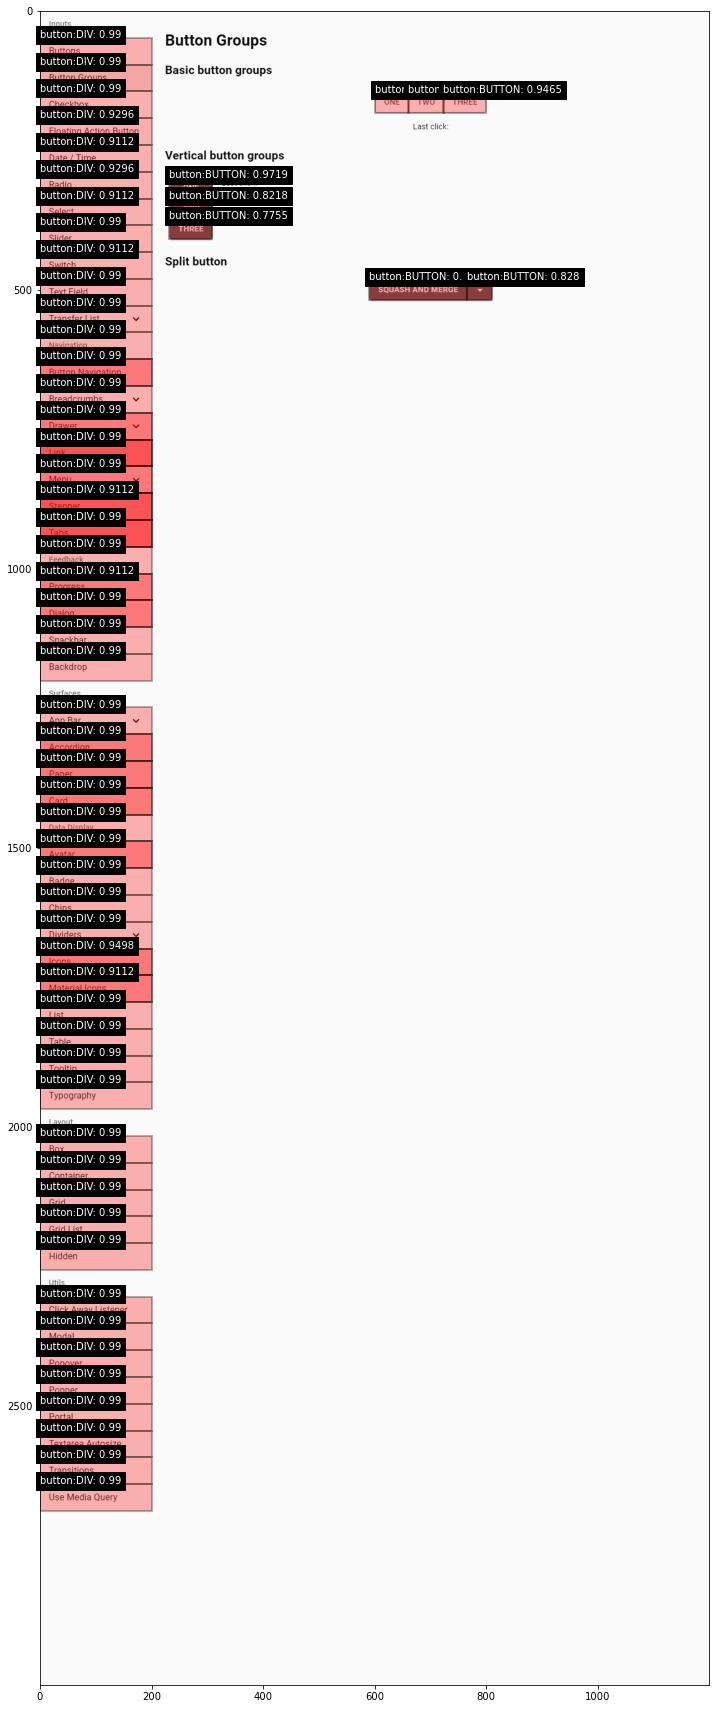

2021-06-07 22:21:58,928 -INFO - hidden:hidden.py:107 - build field "is_hidden"
Image size: 1200 3000
Read annotations for material-ui-Buttons...


,label,x,y,width,height,box
0,0,0.230000,0.054667,0.076667,0.012000,"(229, 146, 92, 36)"
1,0,0.321250,0.054667,0.079167,0.012000,"(337, 146, 95, 36)"
2,0,0.422500,0.054667,0.096667,0.012000,"(448, 146, 116, 36)"
3,0,0.526250,0.054667,0.082500,0.012000,"(582, 146, 99, 36)"
4,0,0.223750,0.102833,0.062500,0.012333,"(231, 289, 75, 36)"
...,...,...,...,...,...,...
90,0,0.082917,0.856000,0.164167,0.016000,"(1, 2544, 197, 48)"
91,0,0.082917,0.872000,0.164167,0.016000,"(1, 2592, 197, 48)"
92,0,0.082917,0.888000,0.164167,0.016000,"(1, 2640, 197, 48)"
93,1,0.607083,0.054667,0.052500,0.012000,"(696, 146, 63, 36)"


2021-06-07 22:21:59,269 -INFO - labels:labels.py:40 - Assign labels from annotation file: dataset/annotations/material-ui-Buttons.txt
2021-06-07 22:21:59,270 -INFO - labels:labels.py:42 - Getting image size
2021-06-07 22:21:59,272 -INFO - labels:labels.py:44 - Image size (w,h): (1200, 3000)
2021-06-07 22:21:59,273 -INFO - labels:labels.py:49 - {'button': 0, 'link': 1, 'textfield': 2, 'dropdown': 3, 'checkbox': 4, 'radiobutton': 5, 'textarea': 6, 'fileinput': 7, 'iframe': 8, 'range': 9, 'progressbar': 10, 'datetimeselector': 11, 'colorpicker': 12, 'numberselector': 13, 'selector': 14, 'table': 15, 'slider-toggle': 16, 'slider': 17, 'tree-node': 18, 'steper': 19, 'tab': 20, 'n/a': 21}
2021-06-07 22:21:59,273 -INFO - labels:labels.py:57 - getting "n/a" class code
2021-06-07 22:21:59,274 -INFO - labels:labels.py:64 - "n/a" class code: 21
2021-06-07 22:21:59,276 -INFO - labels:labels.py:74 - 95 annotation has been read


Assign labels:   0%|          | 0/95 [00:00<?, ?it/s]

2021-06-07 22:22:06,650 -INFO - labels:labels.py:123 - labels_df: Index(['idx', 'label', 'annotation_line_no', 'iou', 'tag', 'label_text'], dtype='object')
2021-06-07 22:22:06,651 -INFO - labels:labels.py:126 - 95 labels have been assigned
Attempt to display image...


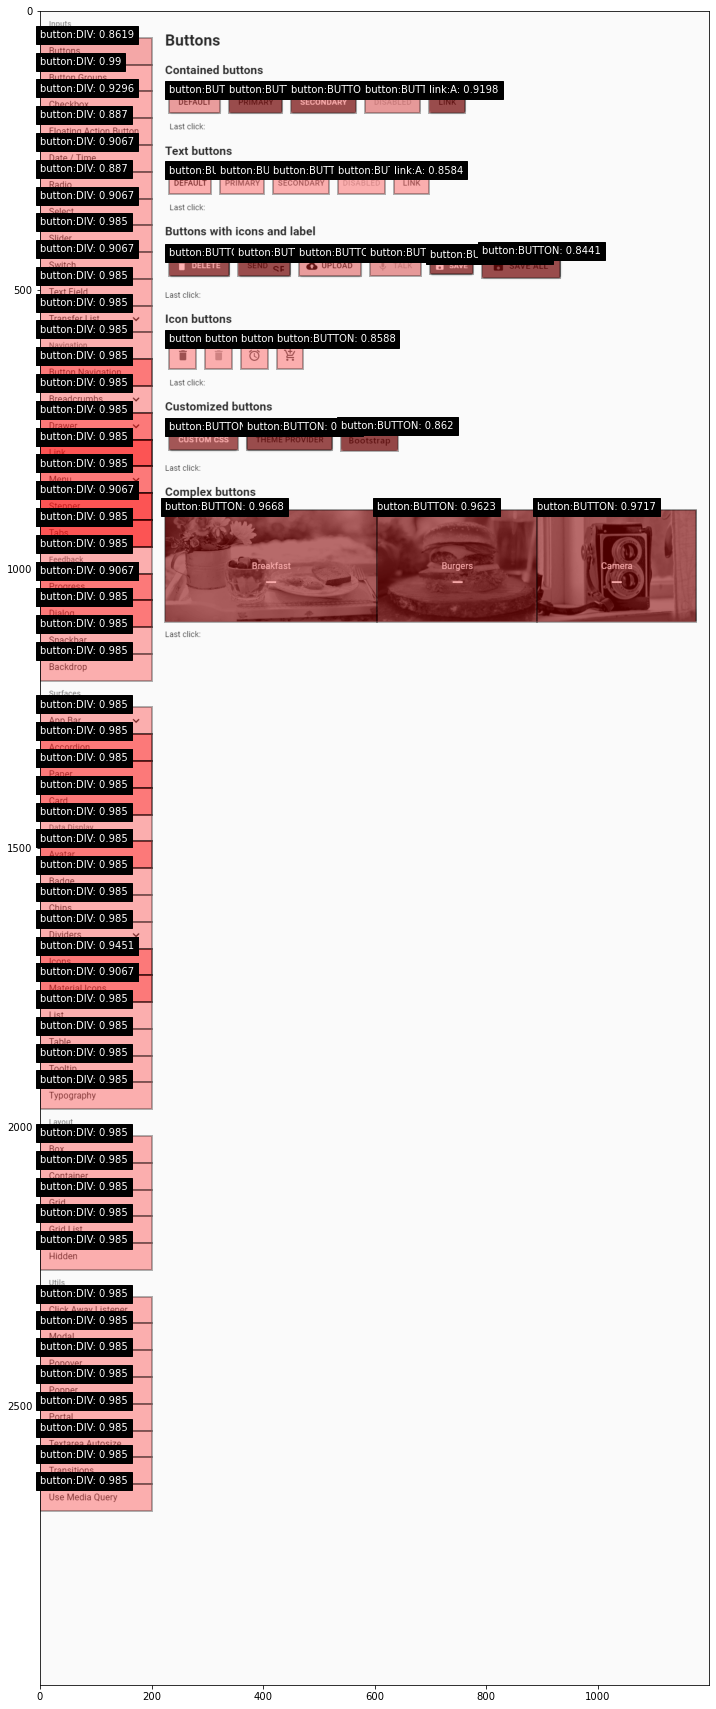

2021-06-07 22:22:07,865 -INFO - hidden:hidden.py:107 - build field "is_hidden"
Image size: 1200 3000
Read annotations for material-ui-Textarea Autosize...


,label,x,y,width,height,box
0,0,0.082917,0.024000,0.164167,0.016000,"(1, 48, 197, 48)"
1,0,0.082917,0.040000,0.164167,0.016000,"(1, 96, 197, 48)"
2,0,0.082917,0.056000,0.164167,0.016000,"(1, 144, 197, 48)"
3,0,0.082917,0.071500,0.164167,0.015667,"(1, 190, 197, 47)"
4,0,0.082917,0.087500,0.164167,0.016333,"(1, 238, 197, 48)"
...,...,...,...,...,...,...
67,0,0.082917,0.872000,0.164167,0.016000,"(1, 2592, 197, 48)"
68,0,0.082917,0.888000,0.164167,0.016000,"(1, 2640, 197, 48)"
69,6,0.262917,0.049833,0.155833,0.007000,"(222, 138, 186, 21)"
70,6,0.262500,0.085333,0.155000,0.018000,"(222, 228, 186, 53)"


2021-06-07 22:22:08,330 -INFO - labels:labels.py:40 - Assign labels from annotation file: dataset/annotations/material-ui-Textarea Autosize.txt
2021-06-07 22:22:08,330 -INFO - labels:labels.py:42 - Getting image size
2021-06-07 22:22:08,331 -INFO - labels:labels.py:44 - Image size (w,h): (1200, 3000)
2021-06-07 22:22:08,333 -INFO - labels:labels.py:49 - {'button': 0, 'link': 1, 'textfield': 2, 'dropdown': 3, 'checkbox': 4, 'radiobutton': 5, 'textarea': 6, 'fileinput': 7, 'iframe': 8, 'range': 9, 'progressbar': 10, 'datetimeselector': 11, 'colorpicker': 12, 'numberselector': 13, 'selector': 14, 'table': 15, 'slider-toggle': 16, 'slider': 17, 'tree-node': 18, 'steper': 19, 'tab': 20, 'n/a': 21}
2021-06-07 22:22:08,334 -INFO - labels:labels.py:57 - getting "n/a" class code
2021-06-07 22:22:08,334 -INFO - labels:labels.py:64 - "n/a" class code: 21
2021-06-07 22:22:08,336 -INFO - labels:labels.py:74 - 72 annotation has been read


Assign labels:   0%|          | 0/72 [00:00<?, ?it/s]

2021-06-07 22:22:13,070 -INFO - labels:labels.py:123 - labels_df: Index(['idx', 'label', 'annotation_line_no', 'iou', 'tag', 'label_text'], dtype='object')
2021-06-07 22:22:13,071 -INFO - labels:labels.py:126 - 72 labels have been assigned
Attempt to display image...


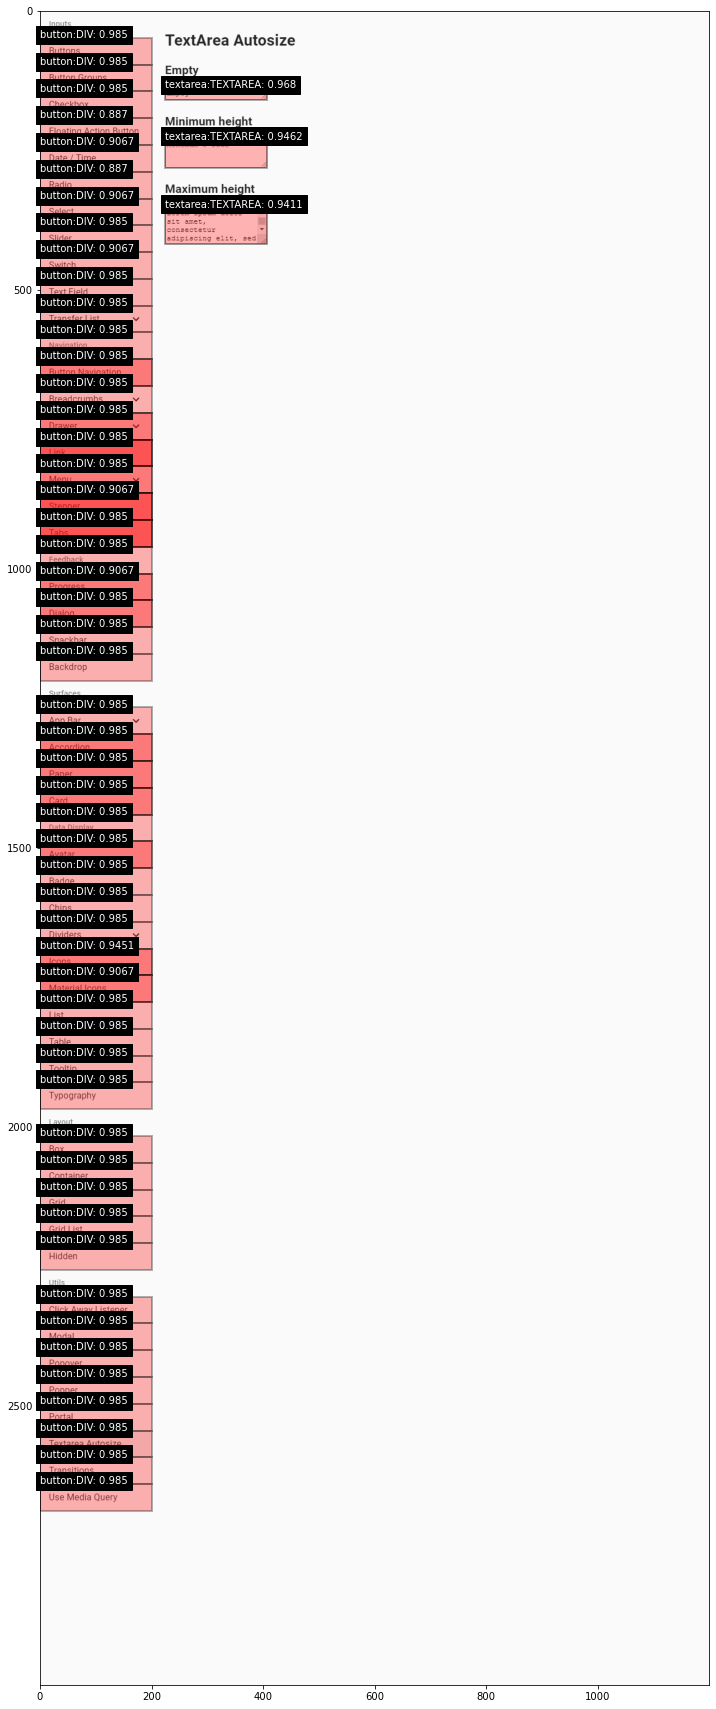

2021-06-07 22:22:14,208 -INFO - hidden:hidden.py:107 - build field "is_hidden"
Image size: 1200 3000
Read annotations for material-ui-Checkbox...


,label,x,y,width,height,box
0,4,0.204167,0.053000,0.035000,0.014000,"(224, 138, 42, 42)"
1,4,0.239167,0.053000,0.035000,0.014000,"(266, 138, 42, 42)"
2,4,0.274167,0.053000,0.035000,0.014000,"(308, 138, 42, 42)"
3,4,0.309167,0.053000,0.035000,0.014000,"(350, 138, 42, 42)"
4,4,0.344167,0.053000,0.035000,0.014000,"(392, 138, 42, 42)"
...,...,...,...,...,...,...
101,4,0.381250,0.180167,0.030833,0.011000,"(439, 524, 36, 33)"
102,4,0.217500,0.244167,0.030000,0.011667,"(243, 715, 36, 35)"
103,4,0.308333,0.239833,0.031667,0.011667,"(350, 701, 38, 35)"
104,4,0.353750,0.236000,0.030833,0.012000,"(406, 690, 36, 36)"


2021-06-07 22:22:14,585 -INFO - labels:labels.py:40 - Assign labels from annotation file: dataset/annotations/material-ui-Checkbox.txt
2021-06-07 22:22:14,586 -INFO - labels:labels.py:42 - Getting image size
2021-06-07 22:22:14,587 -INFO - labels:labels.py:44 - Image size (w,h): (1200, 3000)
2021-06-07 22:22:14,588 -INFO - labels:labels.py:49 - {'button': 0, 'link': 1, 'textfield': 2, 'dropdown': 3, 'checkbox': 4, 'radiobutton': 5, 'textarea': 6, 'fileinput': 7, 'iframe': 8, 'range': 9, 'progressbar': 10, 'datetimeselector': 11, 'colorpicker': 12, 'numberselector': 13, 'selector': 14, 'table': 15, 'slider-toggle': 16, 'slider': 17, 'tree-node': 18, 'steper': 19, 'tab': 20, 'n/a': 21}
2021-06-07 22:22:14,589 -INFO - labels:labels.py:57 - getting "n/a" class code
2021-06-07 22:22:14,590 -INFO - labels:labels.py:64 - "n/a" class code: 21
2021-06-07 22:22:14,592 -INFO - labels:labels.py:74 - 106 annotation has been read


Assign labels:   0%|          | 0/106 [00:00<?, ?it/s]

2021-06-07 22:22:23,721 -INFO - labels:labels.py:123 - labels_df: Index(['idx', 'label', 'annotation_line_no', 'iou', 'tag', 'label_text'], dtype='object')
2021-06-07 22:22:23,722 -INFO - labels:labels.py:126 - 106 labels have been assigned
Attempt to display image...


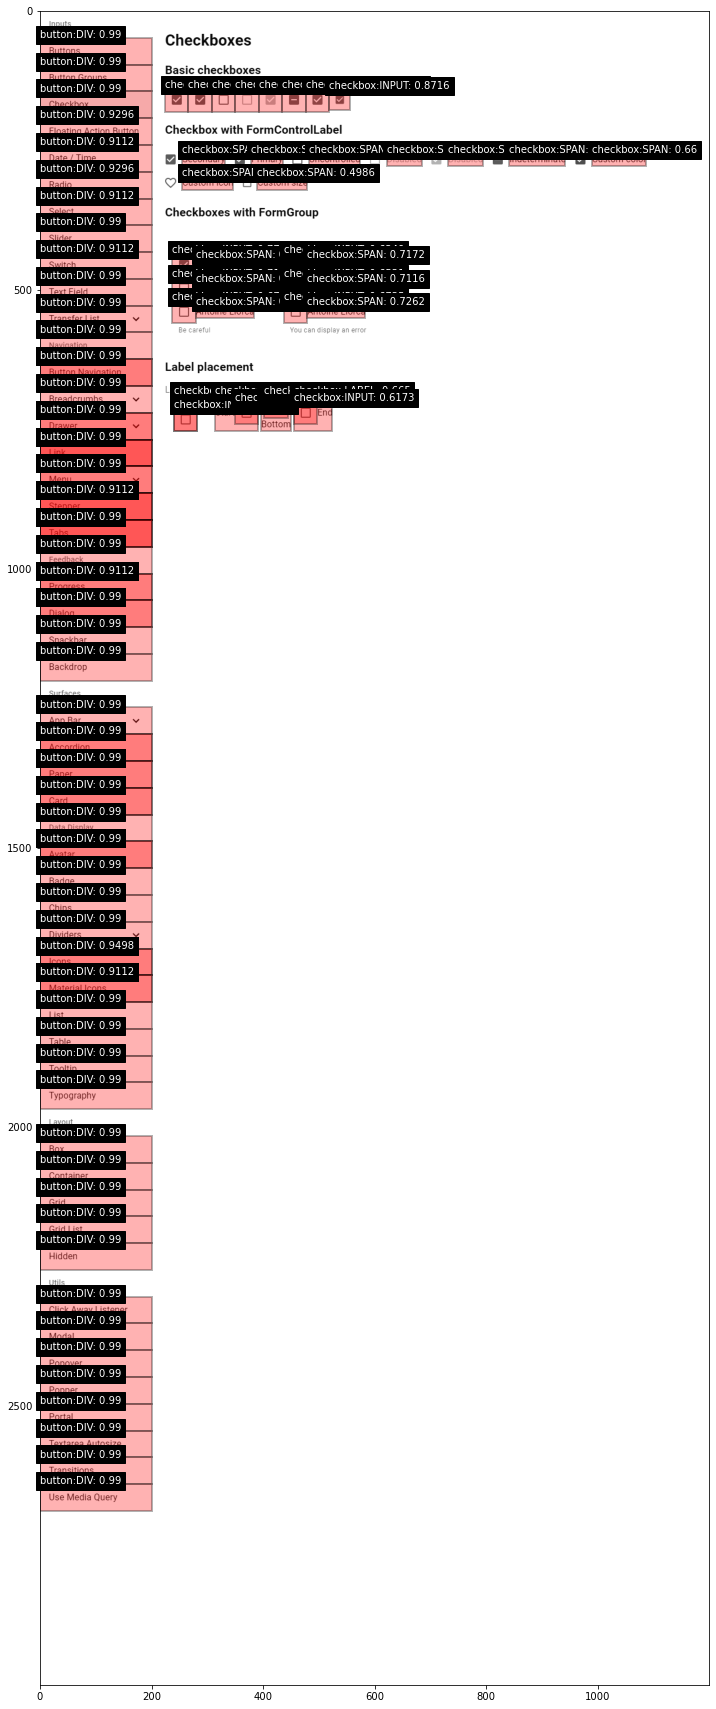

2021-06-07 22:22:25,072 -INFO - hidden:hidden.py:107 - build field "is_hidden"
Image size: 1200 3000
Read annotations for material-ui-Floating Action Button...


,label,x,y,width,height,box
0,0,0.216667,0.058057,0.046667,0.018667,"(232, 146, 56, 56)"
1,0,0.276667,0.058057,0.046667,0.018667,"(304, 146, 56, 56)"
2,0,0.368965,0.058057,0.111263,0.016000,"(376, 150, 133, 48)"
3,0,0.461263,0.058057,0.046667,0.018667,"(525, 146, 56, 56)"
4,0,0.256113,0.111005,0.138893,0.016000,"(223, 309, 166, 48)"
...,...,...,...,...,...,...
72,0,0.083333,0.824000,0.166667,0.016000,"(0, 2448, 200, 48)"
73,0,0.083333,0.840000,0.166667,0.016000,"(0, 2496, 200, 48)"
74,0,0.083333,0.856000,0.166667,0.016000,"(0, 2544, 200, 48)"
75,0,0.083333,0.872000,0.166667,0.016000,"(0, 2592, 200, 48)"


2021-06-07 22:22:25,382 -INFO - labels:labels.py:40 - Assign labels from annotation file: dataset/annotations/material-ui-Floating Action Button.txt
2021-06-07 22:22:25,383 -INFO - labels:labels.py:42 - Getting image size
2021-06-07 22:22:25,383 -INFO - labels:labels.py:44 - Image size (w,h): (1200, 3000)
2021-06-07 22:22:25,383 -INFO - labels:labels.py:49 - {'button': 0, 'link': 1, 'textfield': 2, 'dropdown': 3, 'checkbox': 4, 'radiobutton': 5, 'textarea': 6, 'fileinput': 7, 'iframe': 8, 'range': 9, 'progressbar': 10, 'datetimeselector': 11, 'colorpicker': 12, 'numberselector': 13, 'selector': 14, 'table': 15, 'slider-toggle': 16, 'slider': 17, 'tree-node': 18, 'steper': 19, 'tab': 20, 'n/a': 21}
2021-06-07 22:22:25,383 -INFO - labels:labels.py:57 - getting "n/a" class code
2021-06-07 22:22:25,383 -INFO - labels:labels.py:64 - "n/a" class code: 21
2021-06-07 22:22:25,383 -INFO - labels:labels.py:74 - 77 annotation has been read


Assign labels:   0%|          | 0/77 [00:00<?, ?it/s]

2021-06-07 22:22:30,812 -INFO - labels:labels.py:123 - labels_df: Index(['idx', 'label', 'annotation_line_no', 'iou', 'tag', 'label_text'], dtype='object')
2021-06-07 22:22:30,812 -INFO - labels:labels.py:126 - 77 labels have been assigned
Attempt to display image...


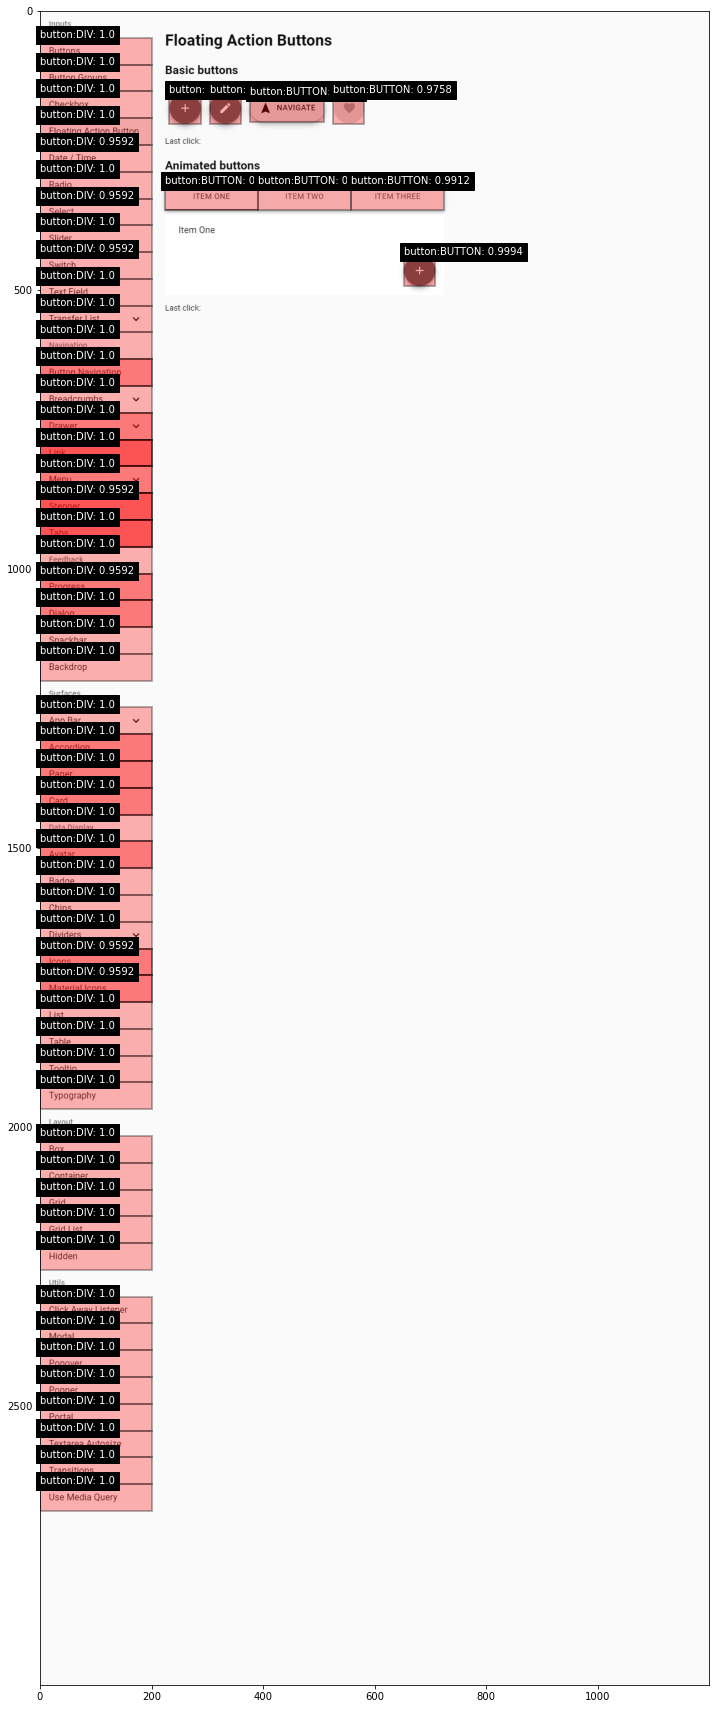

2021-06-07 22:22:31,903 -INFO - hidden:hidden.py:107 - build field "is_hidden"
Image size: 1200 3000
Read annotations for material-ui-Radio...


,label,x,y,width,height,box
0,5,0.195000,0.053000,0.035,0.014,"(213, 138, 42, 42)"
1,5,0.260833,0.053000,0.035,0.014,"(291, 138, 42, 42)"
2,5,0.345000,0.053000,0.035,0.014,"(392, 138, 42, 42)"
3,5,0.415000,0.053000,0.035,0.014,"(476, 138, 42, 42)"
4,5,0.217500,0.112667,0.035,0.014,"(240, 317, 42, 42)"
...,...,...,...,...,...,...
75,0,0.083333,0.824000,0.165,0.016,"(0, 2448, 198, 48)"
76,0,0.083333,0.840000,0.165,0.016,"(0, 2496, 198, 48)"
77,0,0.083333,0.856000,0.165,0.016,"(0, 2544, 198, 48)"
78,0,0.083333,0.872000,0.165,0.016,"(0, 2592, 198, 48)"


2021-06-07 22:22:32,232 -INFO - labels:labels.py:40 - Assign labels from annotation file: dataset/annotations/material-ui-Radio.txt
2021-06-07 22:22:32,232 -INFO - labels:labels.py:42 - Getting image size
2021-06-07 22:22:32,232 -INFO - labels:labels.py:44 - Image size (w,h): (1200, 3000)
2021-06-07 22:22:32,232 -INFO - labels:labels.py:49 - {'button': 0, 'link': 1, 'textfield': 2, 'dropdown': 3, 'checkbox': 4, 'radiobutton': 5, 'textarea': 6, 'fileinput': 7, 'iframe': 8, 'range': 9, 'progressbar': 10, 'datetimeselector': 11, 'colorpicker': 12, 'numberselector': 13, 'selector': 14, 'table': 15, 'slider-toggle': 16, 'slider': 17, 'tree-node': 18, 'steper': 19, 'tab': 20, 'n/a': 21}
2021-06-07 22:22:32,232 -INFO - labels:labels.py:57 - getting "n/a" class code
2021-06-07 22:22:32,232 -INFO - labels:labels.py:64 - "n/a" class code: 21
2021-06-07 22:22:32,232 -INFO - labels:labels.py:74 - 80 annotation has been read


Assign labels:   0%|          | 0/80 [00:00<?, ?it/s]

2021-06-07 22:22:38,482 -INFO - labels:labels.py:123 - labels_df: Index(['idx', 'label', 'annotation_line_no', 'iou', 'tag', 'label_text'], dtype='object')
2021-06-07 22:22:38,483 -INFO - labels:labels.py:126 - 80 labels have been assigned
Attempt to display image...


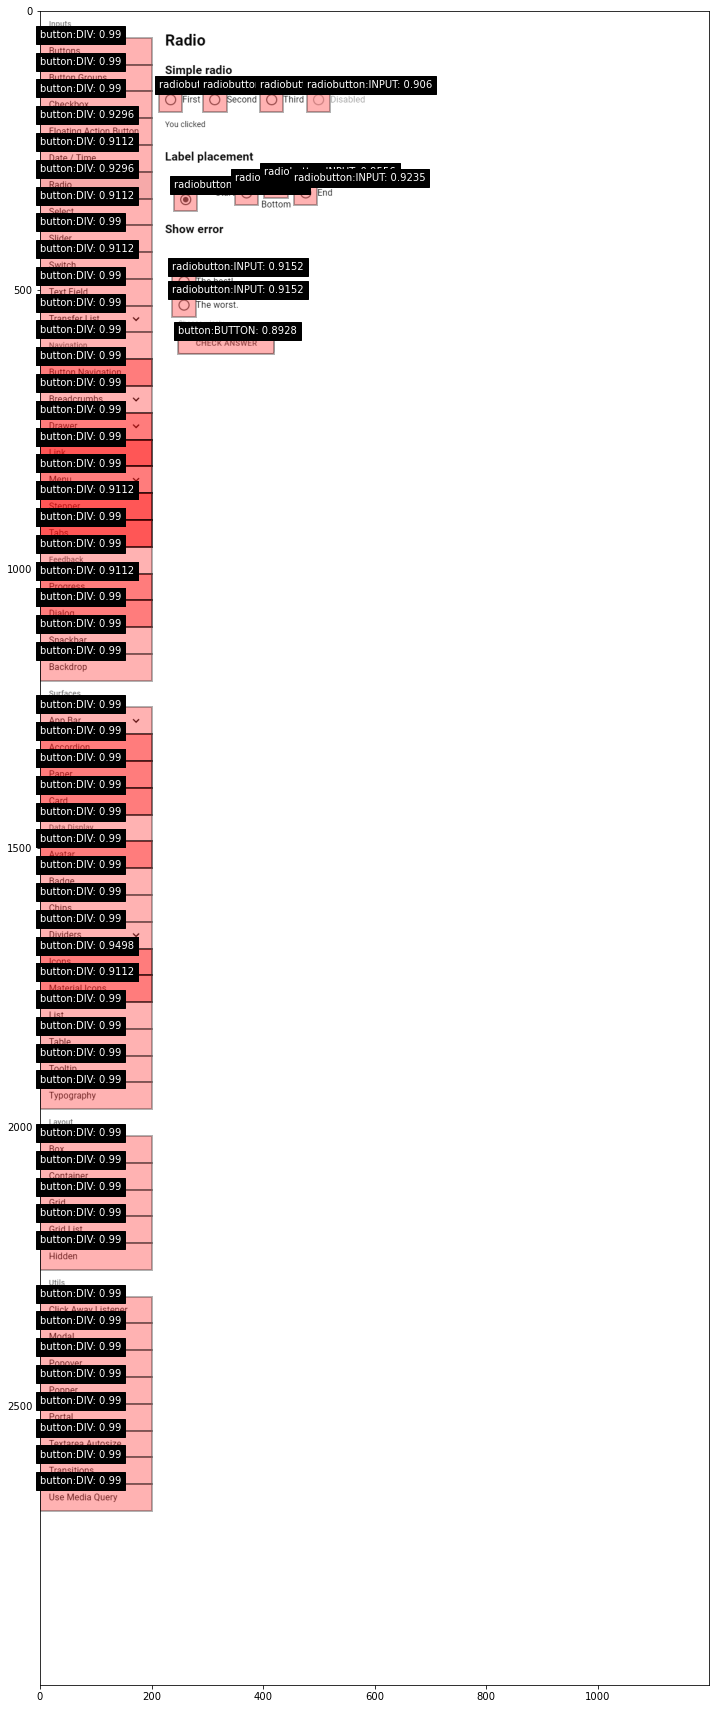

2021-06-07 22:22:39,620 -INFO - hidden:hidden.py:107 - build field "is_hidden"
Image size: 1200 3000
Read annotations for material-ui-Select...


,label,x,y,width,height,box
0,0,0.243750,0.302667,0.117500,0.012000,"(222, 890, 141, 36)"
1,0,0.082917,0.024000,0.164167,0.016000,"(1, 48, 197, 48)"
2,0,0.082917,0.040000,0.164167,0.016000,"(1, 96, 197, 48)"
3,0,0.082917,0.056000,0.164167,0.016000,"(1, 144, 197, 48)"
4,0,0.082917,0.071500,0.164167,0.015667,"(1, 190, 197, 47)"
...,...,...,...,...,...,...
82,14,0.355833,0.173833,0.100000,0.011000,"(366, 504, 120, 33)"
83,4,0.470000,0.173833,0.098333,0.011000,"(505, 504, 117, 33)"
84,14,0.584167,0.172500,0.091667,0.012333,"(646, 499, 110, 36)"
85,14,0.695000,0.172500,0.093333,0.013667,"(778, 496, 111, 41)"


2021-06-07 22:22:39,979 -INFO - labels:labels.py:40 - Assign labels from annotation file: dataset/annotations/material-ui-Select.txt
2021-06-07 22:22:39,980 -INFO - labels:labels.py:42 - Getting image size
2021-06-07 22:22:39,981 -INFO - labels:labels.py:44 - Image size (w,h): (1200, 3000)
2021-06-07 22:22:39,982 -INFO - labels:labels.py:49 - {'button': 0, 'link': 1, 'textfield': 2, 'dropdown': 3, 'checkbox': 4, 'radiobutton': 5, 'textarea': 6, 'fileinput': 7, 'iframe': 8, 'range': 9, 'progressbar': 10, 'datetimeselector': 11, 'colorpicker': 12, 'numberselector': 13, 'selector': 14, 'table': 15, 'slider-toggle': 16, 'slider': 17, 'tree-node': 18, 'steper': 19, 'tab': 20, 'n/a': 21}
2021-06-07 22:22:39,982 -INFO - labels:labels.py:57 - getting "n/a" class code
2021-06-07 22:22:39,983 -INFO - labels:labels.py:64 - "n/a" class code: 21
2021-06-07 22:22:39,985 -INFO - labels:labels.py:74 - 87 annotation has been read


Assign labels:   0%|          | 0/87 [00:00<?, ?it/s]

2021-06-07 22:22:47,397 -INFO - labels:labels.py:123 - labels_df: Index(['idx', 'label', 'annotation_line_no', 'iou', 'tag', 'label_text'], dtype='object')
2021-06-07 22:22:47,397 -INFO - labels:labels.py:126 - 87 labels have been assigned
Attempt to display image...


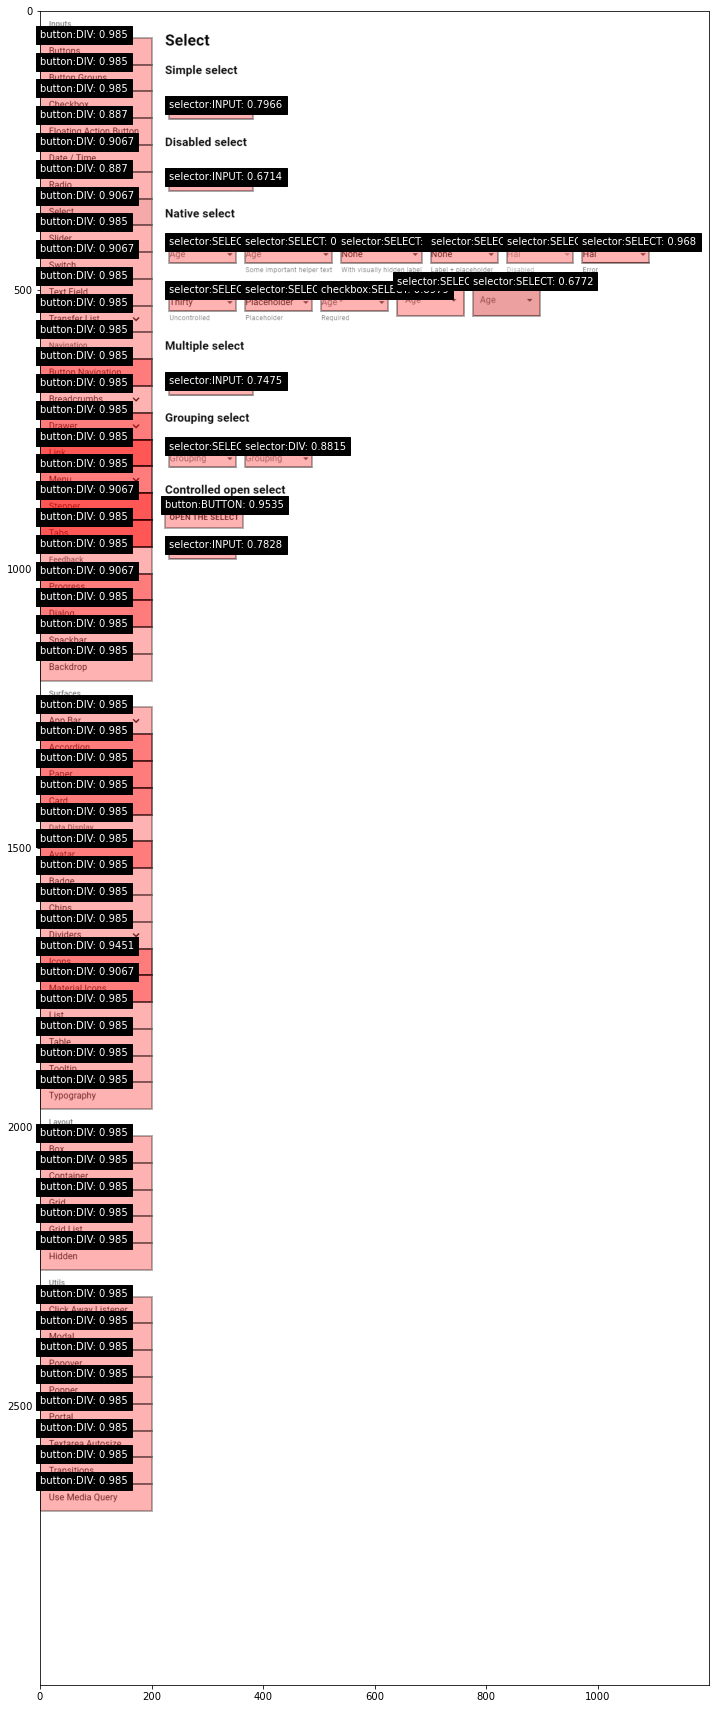

2021-06-07 22:22:48,615 -INFO - hidden:hidden.py:107 - build field "is_hidden"
Image size: 1200 3000
Read annotations for material-ui-Slider...


,label,x,y,width,height,box
0,0,0.082917,0.024000,0.164167,0.016000,"(1, 48, 197, 48)"
1,0,0.082917,0.040000,0.164167,0.016000,"(1, 96, 197, 48)"
2,0,0.082917,0.056000,0.164167,0.016000,"(1, 144, 197, 48)"
3,0,0.082917,0.071500,0.164167,0.015667,"(1, 190, 197, 47)"
4,0,0.082917,0.087500,0.164167,0.016333,"(1, 238, 197, 48)"
...,...,...,...,...,...,...
74,17,0.355417,0.188667,0.334167,0.008667,"(226, 553, 401, 26)"
75,17,0.353750,0.237667,0.335833,0.009333,"(223, 699, 402, 27)"
76,17,0.354167,0.287333,0.336667,0.008667,"(223, 848, 404, 26)"
77,17,0.284583,0.330667,0.129167,0.008667,"(263, 979, 155, 26)"


2021-06-07 22:22:48,948 -INFO - labels:labels.py:40 - Assign labels from annotation file: dataset/annotations/material-ui-Slider.txt
2021-06-07 22:22:48,949 -INFO - labels:labels.py:42 - Getting image size
2021-06-07 22:22:48,949 -INFO - labels:labels.py:44 - Image size (w,h): (1200, 3000)
2021-06-07 22:22:48,951 -INFO - labels:labels.py:49 - {'button': 0, 'link': 1, 'textfield': 2, 'dropdown': 3, 'checkbox': 4, 'radiobutton': 5, 'textarea': 6, 'fileinput': 7, 'iframe': 8, 'range': 9, 'progressbar': 10, 'datetimeselector': 11, 'colorpicker': 12, 'numberselector': 13, 'selector': 14, 'table': 15, 'slider-toggle': 16, 'slider': 17, 'tree-node': 18, 'steper': 19, 'tab': 20, 'n/a': 21}
2021-06-07 22:22:48,951 -INFO - labels:labels.py:57 - getting "n/a" class code
2021-06-07 22:22:48,951 -INFO - labels:labels.py:64 - "n/a" class code: 21
2021-06-07 22:22:48,955 -INFO - labels:labels.py:74 - 79 annotation has been read


Assign labels:   0%|          | 0/79 [00:00<?, ?it/s]

2021-06-07 22:22:55,157 -INFO - labels:labels.py:123 - labels_df: Index(['idx', 'label', 'annotation_line_no', 'iou', 'tag', 'label_text'], dtype='object')
2021-06-07 22:22:55,157 -INFO - labels:labels.py:126 - 79 labels have been assigned
Attempt to display image...


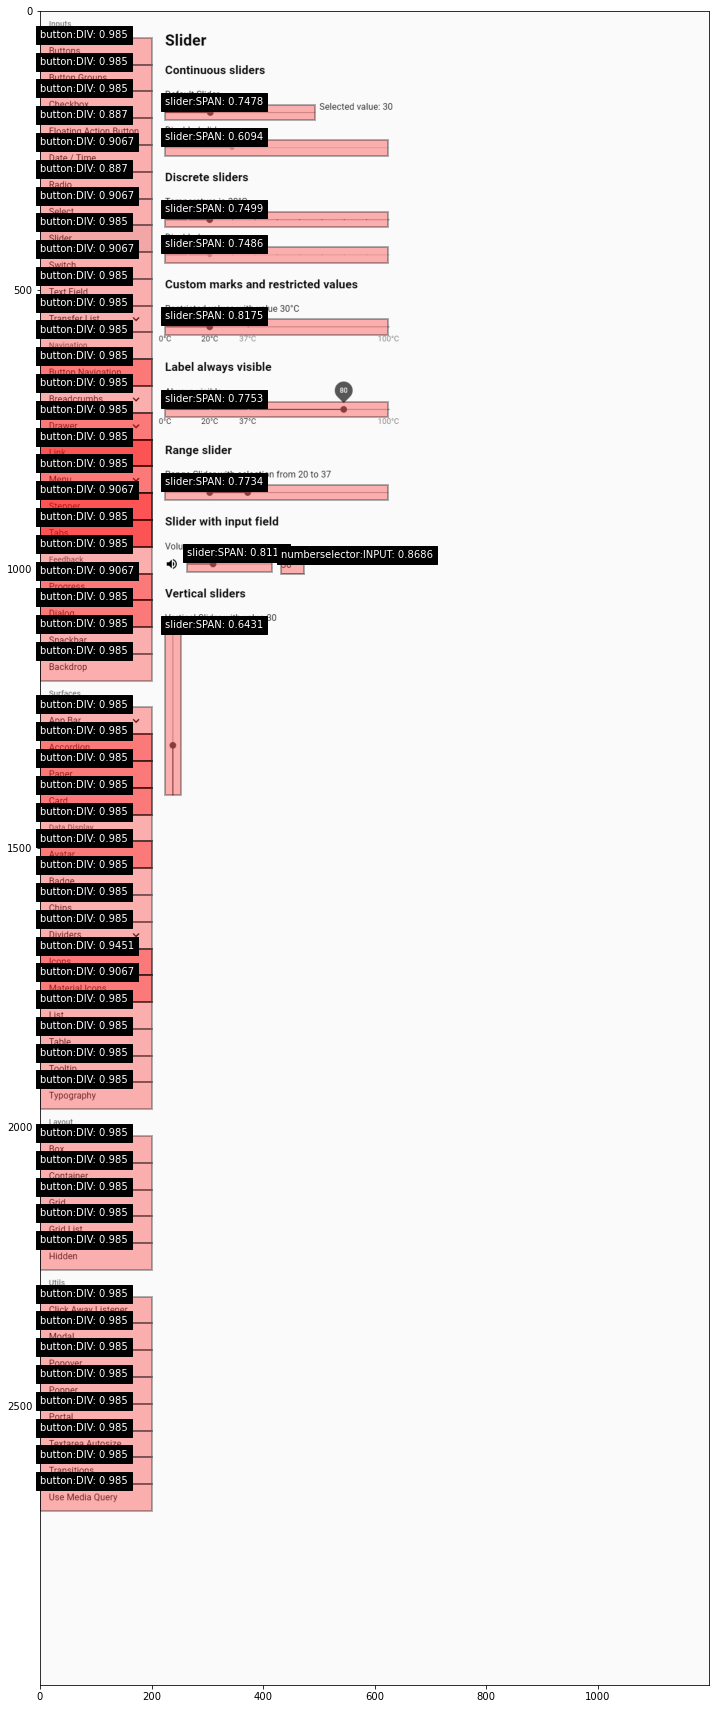

2021-06-07 22:22:56,250 -INFO - hidden:hidden.py:107 - build field "is_hidden"
Image size: 1200 3000
Read annotations for material-ui-Switch...


,label,x,y,width,height,box
0,16,0.213333,0.052167,0.031667,0.007667,"(236, 145, 38, 23)"
1,16,0.260417,0.052833,0.030833,0.008333,"(294, 145, 36, 24)"
2,16,0.354583,0.052333,0.032500,0.008667,"(405, 143, 39, 26)"
3,16,0.305417,0.052500,0.034167,0.008333,"(346, 145, 41, 24)"
4,16,0.202500,0.091833,0.031667,0.007667,"(223, 263, 38, 23)"
...,...,...,...,...,...,...
76,16,0.404583,0.052667,0.032500,0.007333,"(465, 147, 39, 21)"
77,16,0.453750,0.052833,0.029167,0.007667,"(526, 146, 35, 23)"
78,16,0.257083,0.092500,0.062500,0.005667,"(270, 268, 75, 17)"
79,16,0.264583,0.104333,0.079167,0.007333,"(269, 301, 95, 21)"


2021-06-07 22:22:56,829 -INFO - labels:labels.py:40 - Assign labels from annotation file: dataset/annotations/material-ui-Switch.txt
2021-06-07 22:22:56,830 -INFO - labels:labels.py:42 - Getting image size
2021-06-07 22:22:56,830 -INFO - labels:labels.py:44 - Image size (w,h): (1200, 3000)
2021-06-07 22:22:56,831 -INFO - labels:labels.py:49 - {'button': 0, 'link': 1, 'textfield': 2, 'dropdown': 3, 'checkbox': 4, 'radiobutton': 5, 'textarea': 6, 'fileinput': 7, 'iframe': 8, 'range': 9, 'progressbar': 10, 'datetimeselector': 11, 'colorpicker': 12, 'numberselector': 13, 'selector': 14, 'table': 15, 'slider-toggle': 16, 'slider': 17, 'tree-node': 18, 'steper': 19, 'tab': 20, 'n/a': 21}
2021-06-07 22:22:56,832 -INFO - labels:labels.py:57 - getting "n/a" class code
2021-06-07 22:22:56,832 -INFO - labels:labels.py:64 - "n/a" class code: 21
2021-06-07 22:22:56,835 -INFO - labels:labels.py:74 - 81 annotation has been read


Assign labels:   0%|          | 0/81 [00:00<?, ?it/s]

2021-06-07 22:23:02,807 -INFO - labels:labels.py:123 - labels_df: Index(['idx', 'label', 'annotation_line_no', 'iou', 'tag', 'label_text'], dtype='object')
2021-06-07 22:23:02,808 -INFO - labels:labels.py:126 - 81 labels have been assigned
Attempt to display image...


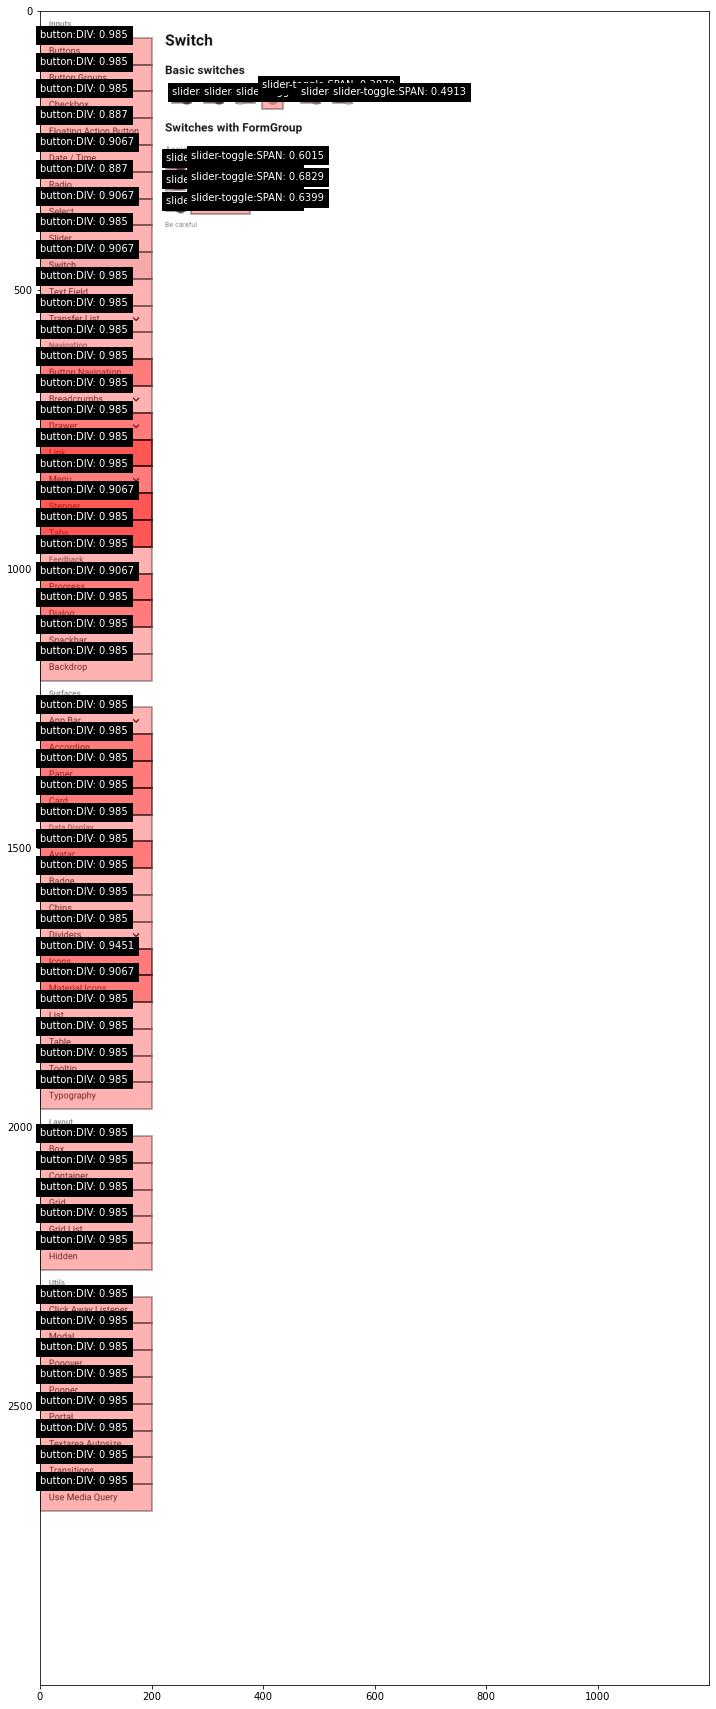

2021-06-07 22:23:03,936 -INFO - hidden:hidden.py:107 - build field "is_hidden"
Image size: 1200 3000
Read annotations for material-ui-Text Field...


,label,x,y,width,height,box
0,2,0.275833,0.059167,0.161667,0.008333,"(233, 165, 194, 24)"
1,2,0.452083,0.058333,0.159167,0.009333,"(446, 160, 191, 27)"
2,2,0.803750,0.059500,0.159167,0.008333,"(868, 166, 191, 24)"
3,2,0.630000,0.080167,0.165000,0.009667,"(657, 226, 198, 29)"
4,2,0.275417,0.132667,0.157500,0.009333,"(236, 384, 189, 27)"
...,...,...,...,...,...,...
83,6,0.627917,0.193167,0.135833,0.025000,"(672, 542, 162, 75)"
84,14,0.452083,0.248000,0.140833,0.007333,"(457, 733, 168, 21)"
85,2,0.629167,0.059500,0.161667,0.008333,"(658, 166, 194, 24)"
86,2,0.452083,0.079333,0.162500,0.008000,"(444, 225, 195, 24)"


2021-06-07 22:23:04,283 -INFO - labels:labels.py:40 - Assign labels from annotation file: dataset/annotations/material-ui-Text Field.txt
2021-06-07 22:23:04,284 -INFO - labels:labels.py:42 - Getting image size
2021-06-07 22:23:04,285 -INFO - labels:labels.py:44 - Image size (w,h): (1200, 3000)
2021-06-07 22:23:04,286 -INFO - labels:labels.py:49 - {'button': 0, 'link': 1, 'textfield': 2, 'dropdown': 3, 'checkbox': 4, 'radiobutton': 5, 'textarea': 6, 'fileinput': 7, 'iframe': 8, 'range': 9, 'progressbar': 10, 'datetimeselector': 11, 'colorpicker': 12, 'numberselector': 13, 'selector': 14, 'table': 15, 'slider-toggle': 16, 'slider': 17, 'tree-node': 18, 'steper': 19, 'tab': 20, 'n/a': 21}
2021-06-07 22:23:04,287 -INFO - labels:labels.py:57 - getting "n/a" class code
2021-06-07 22:23:04,287 -INFO - labels:labels.py:64 - "n/a" class code: 21
2021-06-07 22:23:04,289 -INFO - labels:labels.py:74 - 88 annotation has been read


Assign labels:   0%|          | 0/88 [00:00<?, ?it/s]

2021-06-07 22:23:11,232 -INFO - labels:labels.py:123 - labels_df: Index(['idx', 'label', 'annotation_line_no', 'iou', 'tag', 'label_text'], dtype='object')
2021-06-07 22:23:11,232 -INFO - labels:labels.py:126 - 88 labels have been assigned
Attempt to display image...


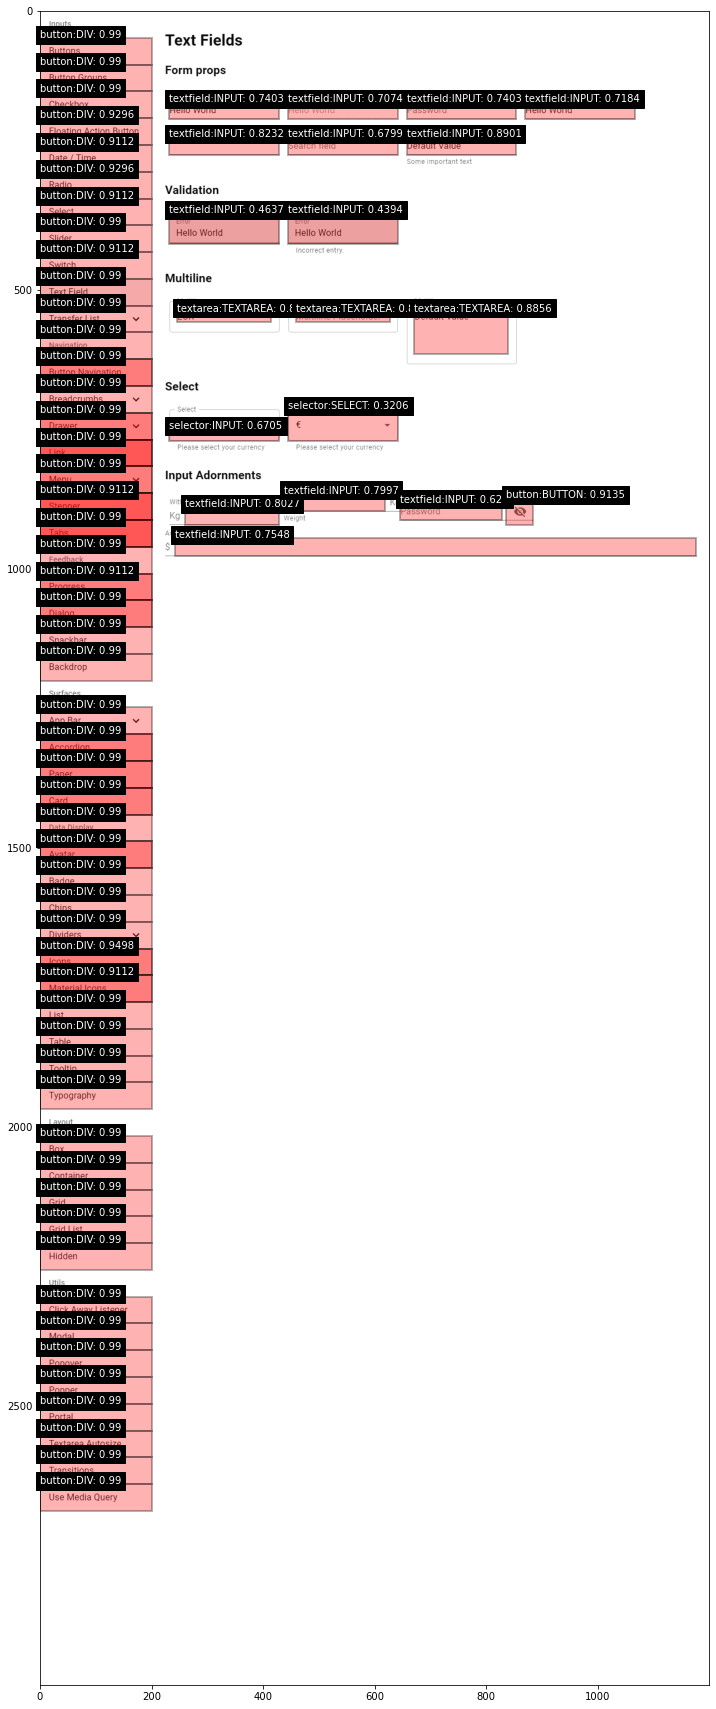

2021-06-07 22:23:12,463 -INFO - hidden:hidden.py:107 - build field "is_hidden"
Image size: 1200 3000
Read annotations for material-ui-List...


,label,x,y,width,height,box
0,5,0.195000,0.106333,0.035000,0.014000,"(213, 297, 42, 42)"
1,5,0.314167,0.106333,0.035000,0.014000,"(356, 297, 42, 42)"
2,5,0.207500,0.413000,0.035000,0.014000,"(228, 1218, 42, 42)"
3,5,0.207500,0.429667,0.035000,0.014000,"(228, 1268, 42, 42)"
4,5,0.207500,0.446333,0.035000,0.014000,"(228, 1317, 42, 42)"
...,...,...,...,...,...,...
88,0,0.499583,0.370000,0.627500,0.016000,"(222, 1086, 752, 48)"
89,0,0.497083,0.413167,0.544167,0.014333,"(269, 1218, 653, 42)"
90,0,0.497917,0.429500,0.544167,0.012333,"(271, 1270, 653, 36)"
91,0,0.497500,0.446333,0.543333,0.012667,"(271, 1319, 651, 38)"


2021-06-07 22:23:12,873 -INFO - labels:labels.py:40 - Assign labels from annotation file: dataset/annotations/material-ui-List.txt
2021-06-07 22:23:12,873 -INFO - labels:labels.py:42 - Getting image size
2021-06-07 22:23:12,874 -INFO - labels:labels.py:44 - Image size (w,h): (1200, 3000)
2021-06-07 22:23:12,876 -INFO - labels:labels.py:49 - {'button': 0, 'link': 1, 'textfield': 2, 'dropdown': 3, 'checkbox': 4, 'radiobutton': 5, 'textarea': 6, 'fileinput': 7, 'iframe': 8, 'range': 9, 'progressbar': 10, 'datetimeselector': 11, 'colorpicker': 12, 'numberselector': 13, 'selector': 14, 'table': 15, 'slider-toggle': 16, 'slider': 17, 'tree-node': 18, 'steper': 19, 'tab': 20, 'n/a': 21}
2021-06-07 22:23:12,876 -INFO - labels:labels.py:57 - getting "n/a" class code
2021-06-07 22:23:12,877 -INFO - labels:labels.py:64 - "n/a" class code: 21
2021-06-07 22:23:12,879 -INFO - labels:labels.py:74 - 93 annotation has been read


Assign labels:   0%|          | 0/93 [00:00<?, ?it/s]

2021-06-07 22:23:22,120 -INFO - labels:labels.py:123 - labels_df: Index(['idx', 'label', 'annotation_line_no', 'iou', 'tag', 'label_text'], dtype='object')
2021-06-07 22:23:22,120 -INFO - labels:labels.py:126 - 93 labels have been assigned
Attempt to display image...


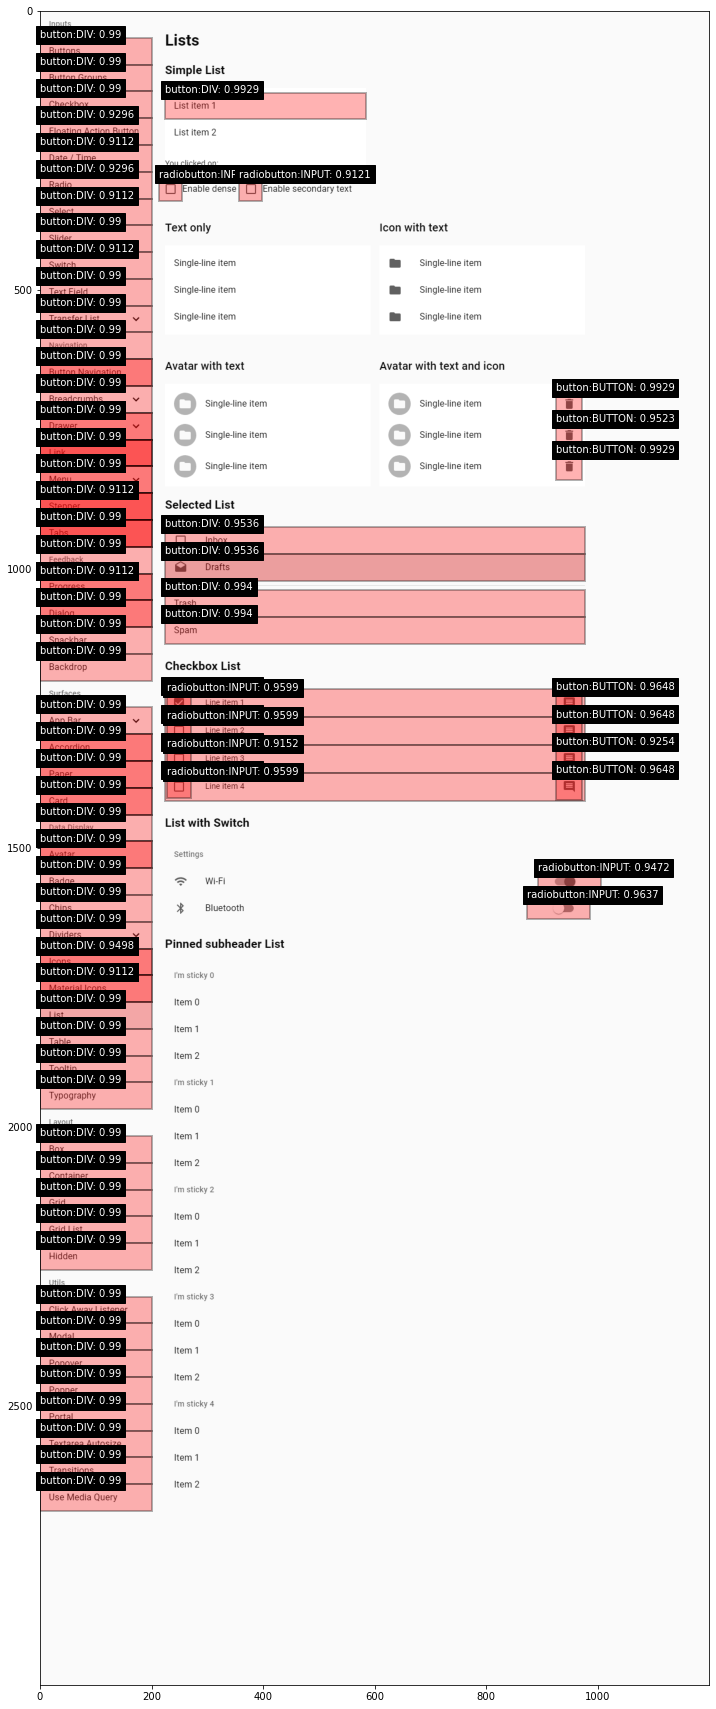

2021-06-07 22:23:23,341 -INFO - hidden:hidden.py:107 - build field "is_hidden"
Image size: 1200 3000
Read annotations for material-ui-Progress...


,label,x,y,width,height,box
0,0,0.216667,0.127667,0.046667,0.018667,"(232, 355, 56, 56)"
1,0,0.310000,0.127667,0.115000,0.012000,"(303, 365, 138, 36)"
2,0,0.393750,0.367000,0.064167,0.012000,"(433, 1083, 77, 36)"
3,0,0.393750,0.403000,0.115833,0.012000,"(403, 1191, 138, 36)"
4,0,0.082917,0.024000,0.164167,0.016000,"(1, 48, 197, 48)"
...,...,...,...,...,...,...
82,10,0.396667,0.245333,0.418333,0.006667,"(225, 725, 501, 20)"
83,10,0.377917,0.270500,0.382500,0.006333,"(224, 802, 459, 18)"
84,15,0.204167,0.302500,0.035000,0.014333,"(224, 886, 42, 42)"
85,10,0.395417,0.320000,0.417500,0.007333,"(224, 949, 501, 21)"


2021-06-07 22:23:23,673 -INFO - labels:labels.py:40 - Assign labels from annotation file: dataset/annotations/material-ui-Progress.txt
2021-06-07 22:23:23,674 -INFO - labels:labels.py:42 - Getting image size
2021-06-07 22:23:23,674 -INFO - labels:labels.py:44 - Image size (w,h): (1200, 3000)
2021-06-07 22:23:23,674 -INFO - labels:labels.py:49 - {'button': 0, 'link': 1, 'textfield': 2, 'dropdown': 3, 'checkbox': 4, 'radiobutton': 5, 'textarea': 6, 'fileinput': 7, 'iframe': 8, 'range': 9, 'progressbar': 10, 'datetimeselector': 11, 'colorpicker': 12, 'numberselector': 13, 'selector': 14, 'table': 15, 'slider-toggle': 16, 'slider': 17, 'tree-node': 18, 'steper': 19, 'tab': 20, 'n/a': 21}
2021-06-07 22:23:23,677 -INFO - labels:labels.py:57 - getting "n/a" class code
2021-06-07 22:23:23,677 -INFO - labels:labels.py:64 - "n/a" class code: 21
2021-06-07 22:23:23,680 -INFO - labels:labels.py:74 - 87 annotation has been read


Assign labels:   0%|          | 0/87 [00:00<?, ?it/s]

2021-06-07 22:23:30,206 -INFO - labels:labels.py:123 - labels_df: Index(['idx', 'label', 'annotation_line_no', 'iou', 'tag', 'label_text'], dtype='object')
2021-06-07 22:23:30,206 -INFO - labels:labels.py:126 - 87 labels have been assigned
Attempt to display image...


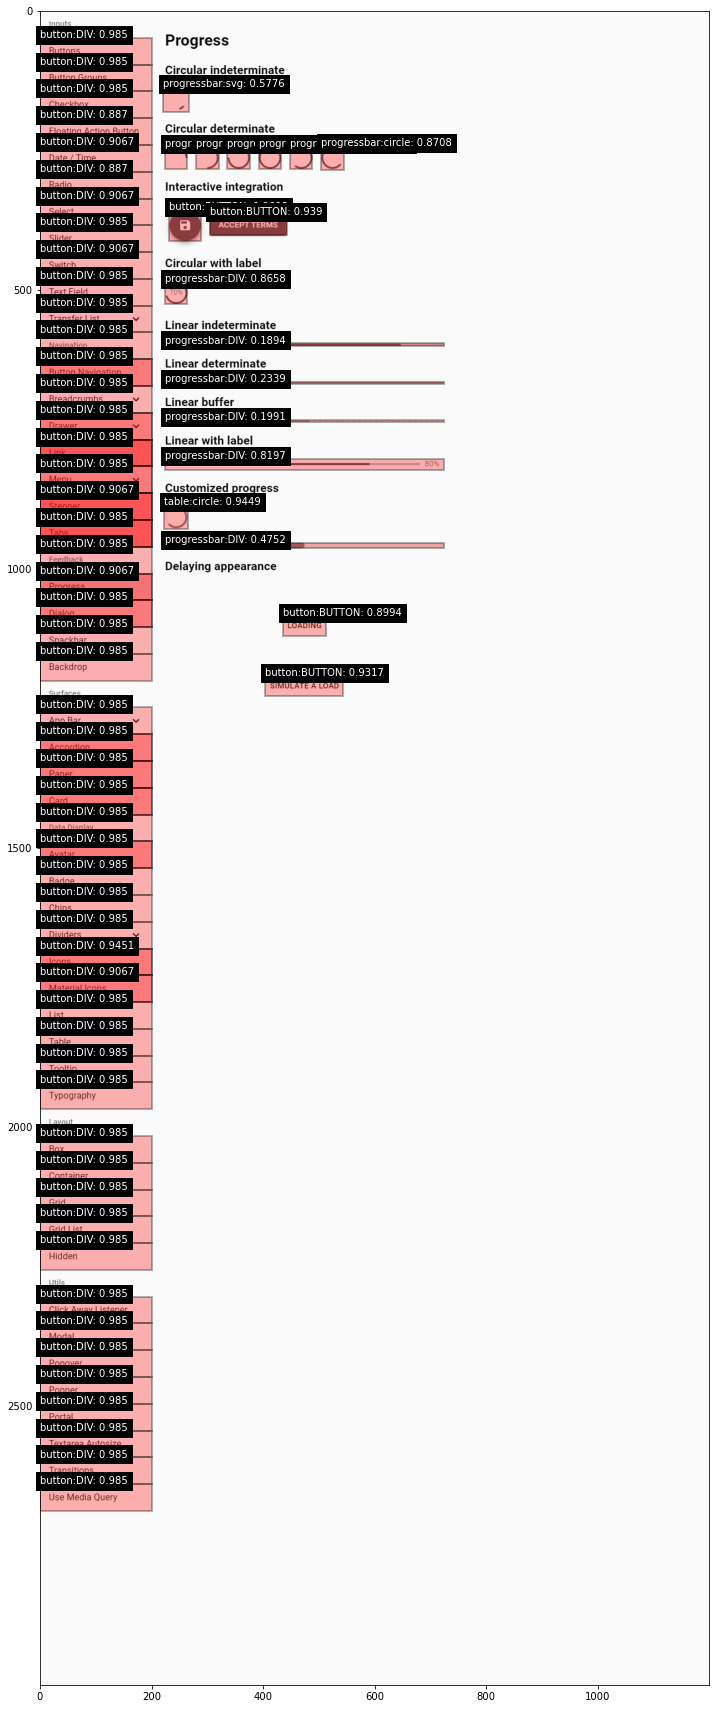

In [11]:
for page in pages:
    
    DATASET_NAME = f'material-ui-{page}'
    
    df = pd.read_parquet(f'dataset/df/{DATASET_NAME}.parquet')
    df = build_features(df)
      
    img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
    img_height, img_width = img.shape
    print('Image size:', img_width, img_height)
    plt.figure(figsize=(12, 500))
    plt.imshow(img, cmap='gray')
    axes = plt.gca()
    
    print(f'Read annotations for {DATASET_NAME}...')
    boxes_df = pd.read_csv(f'dataset/annotations/{DATASET_NAME}.txt', sep=' ', names = ['label', 'x', 'y', 'width', 'height'])
    boxes_df
    boxes_df['box'] = boxes_df.apply(lambda r: from_yolo(r.x, r.y, r.width, r.height, img_width=img_width, img_height=img_height), axis=1)
    display(boxes_df)
    
    columns_to_drop = set(df.columns).intersection(set(['label', 'annotation_line_no', 'iou', 'tag', 'label_text']))
    if len(columns_to_drop) >= 0:
        df.drop(columns=columns_to_drop, inplace=True)
        
    df = assign_labels(df=df, annotations_file_path=f'dataset/annotations/{DATASET_NAME}.txt', img_width=img_width, img_height=img_height)


    for _, r in df[df.label_text != 'n/a'].iterrows():
        x, y, w, h = r.x, r.y, r.width, r.height  
        patch = patches.Rectangle((x, y), w, h, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')

        # print(r.tag_name, r.label_text, (x,y,w,h), r.element_id)

        axes.add_patch(patch)
        plt.text(x, y, 
                 decoder_dict[r.label] + ':' + r.tag_name + ': ' +str(round(r.iou, 4)), # + ':' + str((x, y, w, h)),  ## + r.element_id, 
                 fontsize = 10, 
                 color = 'white', 
                 backgroundcolor='black',
                 alpha=1.)

    print('Attempt to display image...')
    plt.show()
    ## break